In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('../data/AviationData.csv', encoding='latin-1')
df.head()

c:\Users\nateh\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [33]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [56]:
# Events with null locations
df_null_locations = df[df['Location'].isna()].copy()
df_null_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 4239 to 63709
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                52 non-null     object        
 1   Investigation.Type      52 non-null     object        
 2   Accident.Number         52 non-null     object        
 3   Event.Date              52 non-null     datetime64[ns]
 4   Location                0 non-null      object        
 5   Country                 51 non-null     object        
 6   Latitude                5 non-null      object        
 7   Longitude               5 non-null      object        
 8   Airport.Code            2 non-null      object        
 9   Airport.Name            2 non-null      object        
 10  Injury.Severity         52 non-null     object        
 11  Aircraft.damage         45 non-null     object        
 12  Aircraft.Category       9 non-null      object

In [35]:
df.groupby('Aircraft.Category').count()['Event.Id'].sort_values(ascending=False).head(10)

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Name: Event.Id, dtype: int64

In [36]:
df.groupby('Make').count()['Event.Id'].sort_values(ascending=False).head(10)

Make
Cessna     22227
Piper      12029
CESSNA      4922
Beech       4330
PIPER       2841
Bell        2134
Boeing      1594
BOEING      1151
Grumman     1094
Mooney      1092
Name: Event.Id, dtype: int64

In [43]:
#Making everything in the df lowercase so we can get more accurate counts.
df = df.applymap(lambda x: x.lower() if type(x) == str else x)
df.head(10)



,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218x45444,accident,sea87la080,1948-10-24,"moose creek, id",united states,NaN,NaN,NaN,NaN,...,personal,NaN,2.0,0.0,0.0,0.0,unk,cruise,probable cause,NaN
1,20001218x45447,accident,lax94la336,1962-07-19,"bridgeport, ca",united states,NaN,NaN,NaN,NaN,...,personal,NaN,4.0,0.0,0.0,0.0,unk,unknown,probable cause,19-09-1996
2,20061025x01555,accident,nyc07la005,1974-08-30,"saltville, va",united states,36.9222,-81.8781,NaN,NaN,...,personal,NaN,3.0,NaN,NaN,NaN,imc,cruise,probable cause,26-02-2007
3,20001218x45448,accident,lax96la321,1977-06-19,"eureka, ca",united states,NaN,NaN,NaN,NaN,...,personal,NaN,2.0,0.0,0.0,0.0,imc,cruise,probable cause,12-09-2000
4,20041105x01764,accident,chi79fa064,1979-08-02,"canton, oh",united states,NaN,NaN,NaN,NaN,...,personal,NaN,1.0,2.0,NaN,0.0,vmc,approach,probable cause,16-04-1980
5,20170710x52551,accident,nyc79aa106,1979-09-17,"boston, ma",united states,42.4453,-70.7583,NaN,NaN,...,NaN,air canada,NaN,NaN,1.0,44.0,vmc,climb,probable cause,19-09-2017
6,20001218x45446,accident,chi81la106,1981-08-01,"cotton, mn",united states,NaN,NaN,NaN,NaN,...,personal,NaN,4.0,0.0,0.0,0.0,imc,unknown,probable cause,06-11-2001
7,20020909x01562,accident,sea82da022,1982-01-01,"pullman, wa",united states,NaN,NaN,NaN,blackburn ag strip,...,personal,NaN,0.0,0.0,0.0,2.0,vmc,takeoff,probable cause,01-01-1982
8,20020909x01561,accident,nyc82da015,1982-01-01,"east hanover, nj",united states,NaN,NaN,n58,hanover,...,business,NaN,0.0,0.0,0.0,2.0,imc,landing,probable cause,01-01-1982
9,20020909x01560,accident,mia82da029,1982-01-01,"jacksonville, fl",united states,NaN,NaN,jax,jacksonville intl,...,personal,NaN,0.0,0.0,3.0,0.0,imc,cruise,probable cause,01-01-1982


In [44]:
#More accurate 'Make' counts
df.groupby('Make').count()['Event.Id'].sort_values(ascending=False).head(10)

Make
cessna      27149
piper       14870
beech        5372
boeing       2745
bell         2722
mooney       1334
robinson     1230
grumman      1172
bellanca     1045
hughes        932
Name: Event.Id, dtype: int64

In [60]:
df.groupby('Purpose.of.flight').count()['Event.Id'].sort_values(ascending=False).head(10)

Purpose.of.flight
personal              49448
instructional         10601
unknown                6802
aerial application     4712
business               4018
positioning            1646
other work use         1264
ferry                   812
aerial observation      794
public aircraft         720
Name: Event.Id, dtype: int64

<AxesSubplot:>

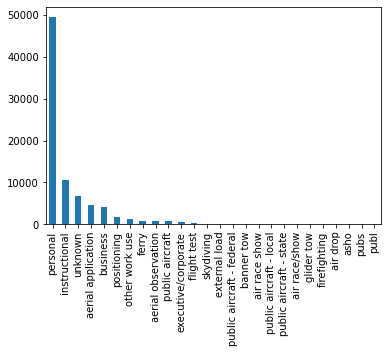

In [72]:
df['Purpose.of.flight'].value_counts().plot(kind='bar')
#So far and away the most common purpose of flight (for which an accident occurs) is personal/instructional



In [74]:
#Now grouping by FAR regulations. See here for more info: https://pilotinstitute.com/part-91-vs-121-vs-135/
df_far = df.groupby('FAR.Description').count()['Event.Id'].sort_values(ascending=False)
df_far.head(10)

FAR.Description
091                              18221
part 91: general aviation         6486
nusn                              1584
nusc                              1013
137                               1010
135                                746
121                                679
part 137: agricultural             437
unk                                371
part 135: air taxi & commuter      298
Name: Event.Id, dtype: int64

In [81]:
#So we first need to clean up this column using a .replace()

df['FAR.Description'] = df['FAR.Description'].replace({
    '091': 'part 91',
    'part 91: general aviation': 'part 91',
    '137': 'part 137',
    '135': 'part 135',
    '121': 'part 121',
    'part 137: agricultural': 'part 137',
    'part 135: air taxi & commuter': 'part 135',
    '129': 'part 129',
    'part 121: air carrier': 'part 121',
    '133': 'part 133',
    'part 129: foreign': 'part 129',
    'part 133: rotorcraft external load': 'part 133',
    'part 133: rotorcraft ext. load': 'part 133',
    '125' : 'part 125',
    'part 125: 20+ pax,6000+ lbs': 'part 125',
    '107': 'part 107',
    '103': 'part 103',
    '437': 'part 437',
    'part91f': 'part 91',
    'part 91 subpart f': 'part 91',
    'part 91f: special flt ops.': 'part 91',
    'part 91 subpart k: fractional': 'part 91',
    ''
}
)

df['FAR.Description'].value_counts()

# Need to figure out what the other FAR descriptions are, e.g. nusn/nusc/unk

part 91                     24709
nusn                         1584
part 137                     1447
part 135                     1044
nusc                         1013
part 121                      844
unk                           371
part 129                      346
pubu                          253
part 133                      139
non-u.s., non-commercial       97
non-u.s., commercial           93
unknown                        22
public use                     19
091k                           14
part 125                       10
armf                            8
part 107                        4
part 103                        2
public aircraft                 2
armed forces                    1
part 437                        1
Name: FAR.Description, dtype: int64

In [94]:
# Need to get this to include the unknowns, too.

df_far_filtered = df[df['FAR.Description'].str.contains('part').fillna(False)].copy()
df_far_filtered['FAR.Description'].value_counts()


part 91     24709
part 137     1447
part 135     1044
part 121      844
part 129      346
part 133      139
part 125       10
part 107        4
part 103        2
part 437        1
Name: FAR.Description, dtype: int64